# Exercise 12



# 12.1

In this part of the excercise we want to study the performances of our Neural Network for different optimizers.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
import scipy.optimize 
from itertools import product 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import os
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)


In [2]:
from keras.datasets import mnist
# input image dimensions 
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255



# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
r=X_test

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')



Model compiled successfully and ready to be trained.


In [6]:
# training parameters
#different parameters to use
N_epochs=[20]
opt=["SGD", "Adam", "RMSprop", "Adagrad"]
batch_size = 32
Combinations = product(N_epochs,opt)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,restore_best_weights=True)
models_DNN=[]
history=[]
for  index,i in enumerate(Combinations):
    print("N_epochs: ",i[0],"| optimizer: ",i[1])
    
    # create the deep neural net
    models_DNN.append(compile_model(i[1]))
    # train DNN and store training info in history
    history.append( models_DNN[index].fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=i[0], callbacks=[callback],
          verbose=1,
          validation_data=(X_test, Y_test)))
##Adam with fewer epochs


N_epochs:  20 | optimizer:  SGD
Epoch 1/20


2022-06-12 16:51:42.139176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7280 - acc: 0.7886 - val_loss: 0.3029 - val_acc: 0.9175
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - acc: 0.8942 - val_loss: 0.2340 - val_acc: 0.9324
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3016 - acc: 0.9159 - val_loss: 0.1970 - val_acc: 0.9419
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - acc: 0.9276 - val_loss: 0.1722 - val_acc: 0.9476
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2301 - acc: 0.9349 - val_loss: 0.1572 - val_acc: 0.9503
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2070 - acc: 0.9417 - val_loss: 0.1429 - val_acc: 0.9546
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1882 - acc: 0.9470 - val_loss: 0.1303 - val_acc: 0.9583
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - los

method: [N_epochs,optimizer]
(20, 'SGD')
Test loss: 0.07686859369277954
Test accuracy: 0.9749000072479248
(20, 'Adam')
Test loss: 0.1421336978673935
Test accuracy: 0.9807000160217285
(20, 'RMSprop')
Test loss: 0.15995033085346222
Test accuracy: 0.9735000133514404
(20, 'Adagrad')
Test loss: 0.2036733627319336
Test accuracy: 0.9412000179290771


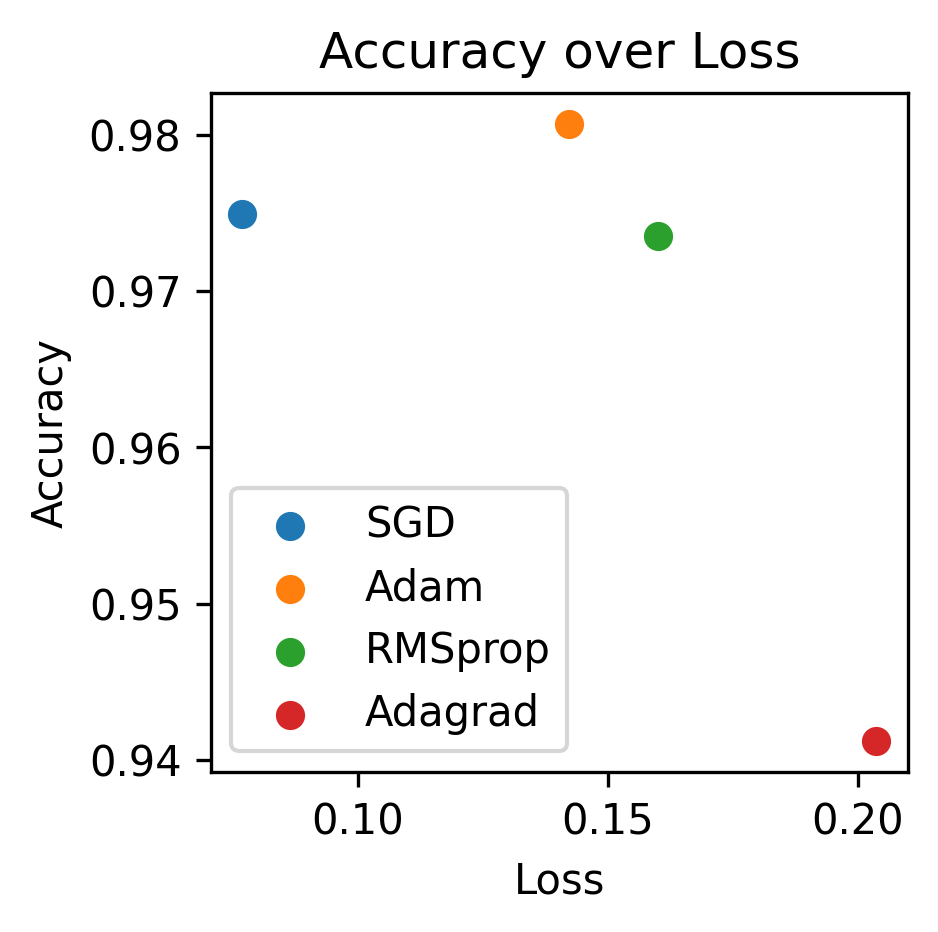

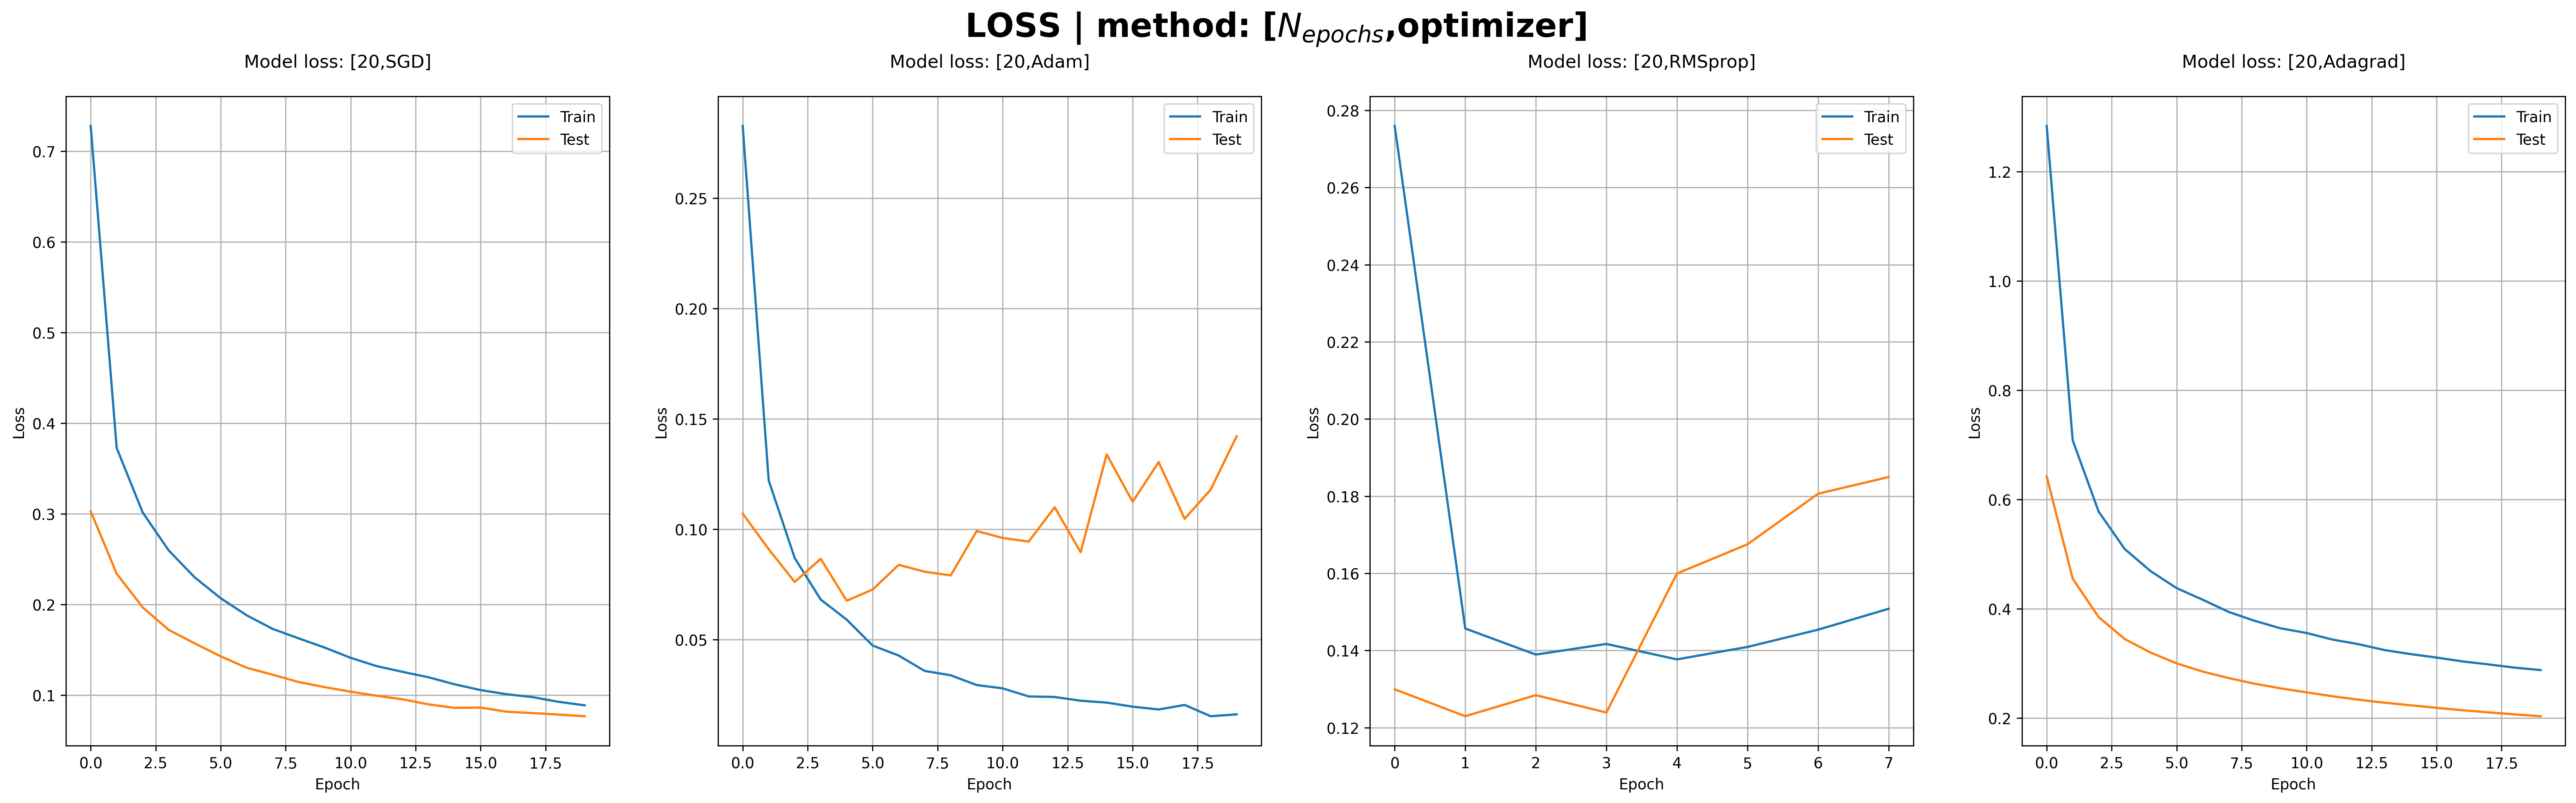

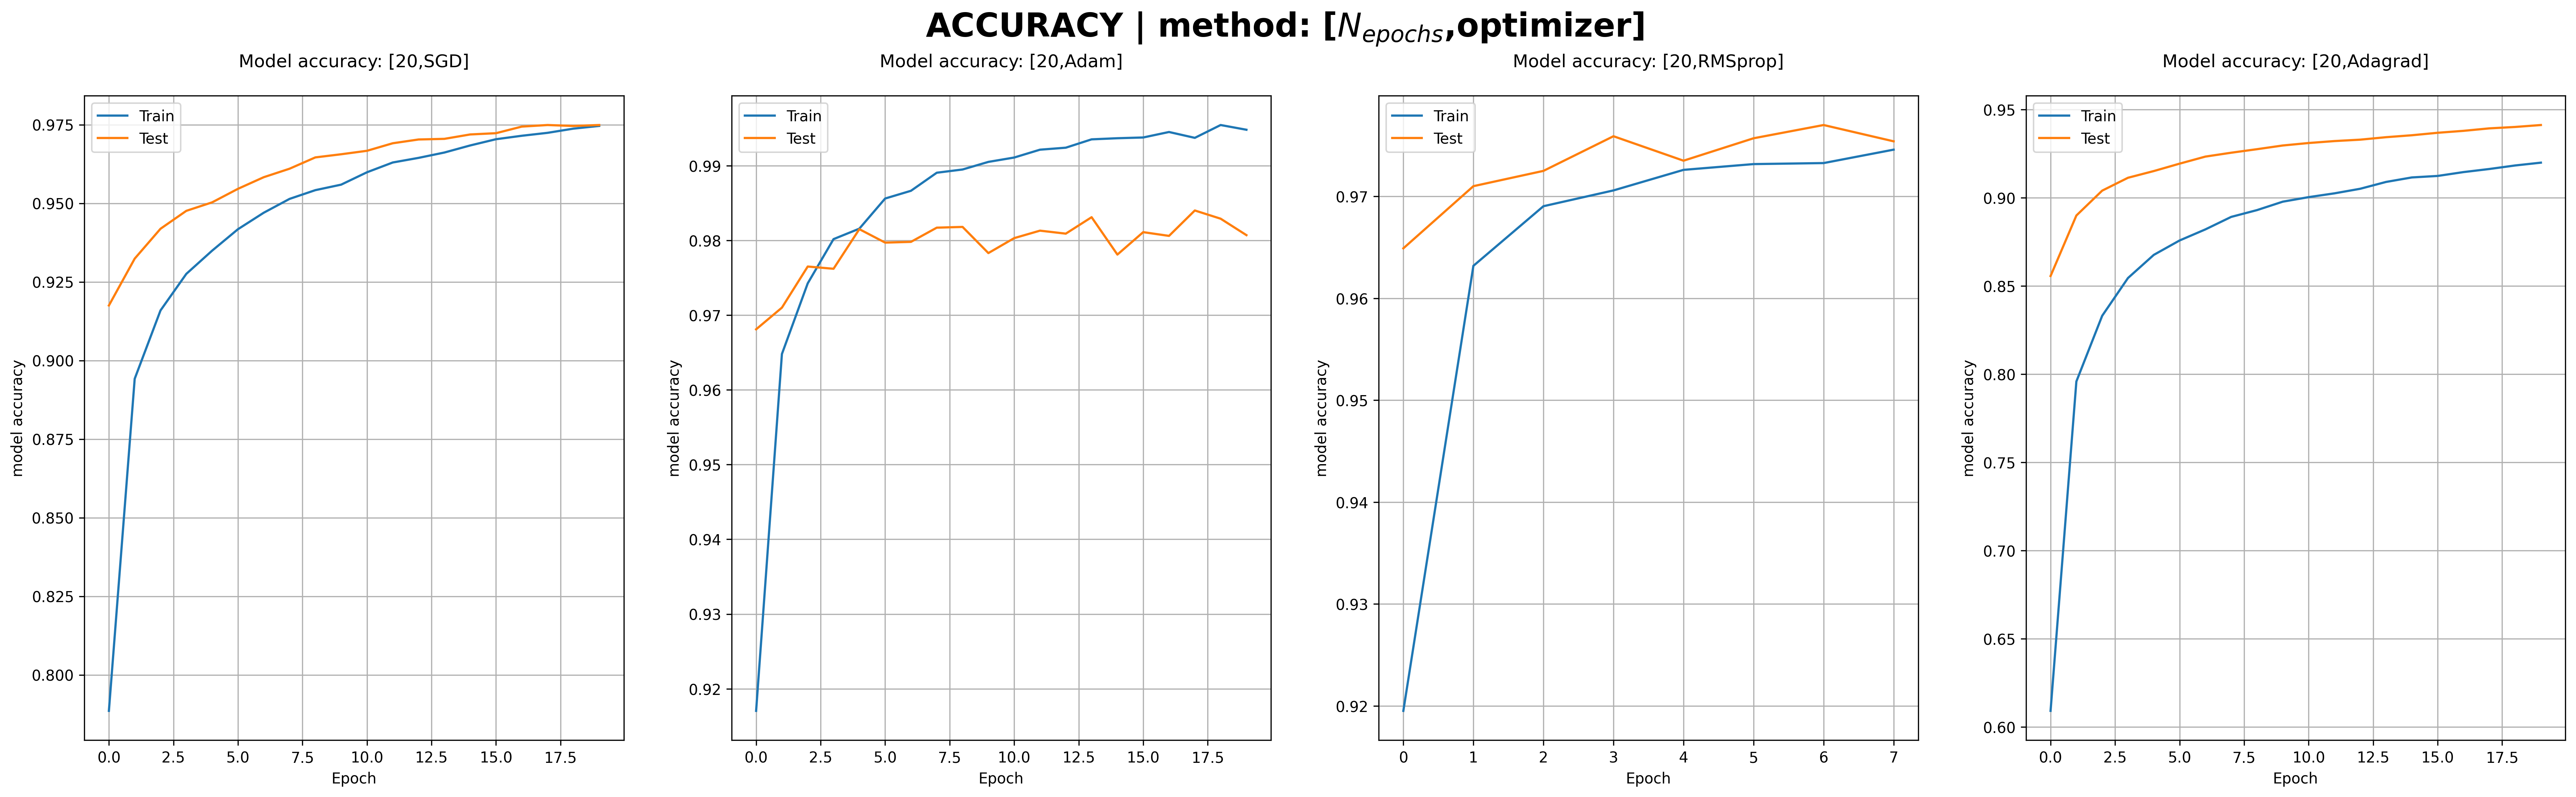

In [7]:
# evaluate model
print("method: [N_epochs,optimizer]")
score=[]
label=[]
Combinations = product(N_epochs,opt)
fig=plt.figure(figsize=(3,3),dpi=300)
for index,i in enumerate(Combinations):
    plt.title("Accuracy over Loss")
    score.append( models_DNN[index].evaluate(X_test, Y_test, verbose=0))
    label.append(i[1])
    plt.scatter(score[index][0],score[index][1],label=(i[1]))
    print(i)
# print performance
    print('Test loss:', score[index][0])
    print('Test accuracy:', score[index][1])
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# look into training history
fig=plt.figure(figsize=(30,8),dpi=300)
plt.suptitle("LOSS | method: [$N_{epochs}$,optimizer]",weight="bold",size=22)
Combinations = product(N_epochs,opt)
for index,i in enumerate(Combinations):
    
    plt.subplot(1,4,index+1)
    plt.plot(history[index].history['loss'])
    plt.plot(history[index].history['val_loss'])
    plt.title('Model loss: '+"["+str(i[0])+","+str(i[1])+"]\n")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid(True)
plt.show()
fig=plt.figure(figsize=(30,8),dpi=300)
plt.suptitle("ACCURACY | method: [$N_{epochs}$,optimizer]",weight="bold",size=22)
Combinations = product(N_epochs,opt)
for index,i in enumerate(Combinations):
    
    plt.subplot(1,4,index+1)
    plt.plot(history[index].history['acc'])
    plt.plot(history[index].history['val_acc'])
    plt.title('Model accuracy: '+"["+str(i[0])+","+str(i[1])+"]\n")
    plt.ylabel('model accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid(True)
plt.show()


In the previous plots, since we have used a dropout layer, we observe that usually the accuracy calculated on the test set is higher than the one calculated on the training set. Moreover, we notice that the Early Stopping function has blocked the **RMSprop** model at the $8$-th epoch.
All models have given an accuracy greater than $94\%$ on the test set.


The plots of the **Adam** model seem to suggest a problem of overfitting.
So, we redo the training of this model with fewer epochs.

In [8]:
ep=8
print("N_epochs: ",ep,"| optimizer: ","Adam")
    
    # create the deep neural net
models_DNN.append(compile_model("Adam"))
label.append("8,Adam")
    # train DNN and store training info in history
history.append( models_DNN[-1].fit(X_train, Y_train,
    batch_size=batch_size,
    epochs=ep, callbacks=[callback],
    verbose=1,
    validation_data=(X_test, Y_test)))

N_epochs:  8 | optimizer:  Adam
Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2857 - acc: 0.9154 - val_loss: 0.1111 - val_acc: 0.9651
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1247 - acc: 0.9647 - val_loss: 0.0980 - val_acc: 0.9703
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0873 - acc: 0.9750 - val_loss: 0.0792 - val_acc: 0.9768
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0686 - acc: 0.9794 - val_loss: 0.0854 - val_acc: 0.9759
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0574 - acc: 0.9833 - val_loss: 0.0781 - val_acc: 0.9784
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0461 - acc: 0.9861 - val_loss: 0.0739 - val_acc: 0.9801
Epoch 7/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0410 - acc: 0.9871 - val_loss: 0.0837 - val_acc: 0.9784
Epoch 8/8
1875/1875 [================

Test loss: 0.08243311941623688
Test accuracy: 0.9800000190734863


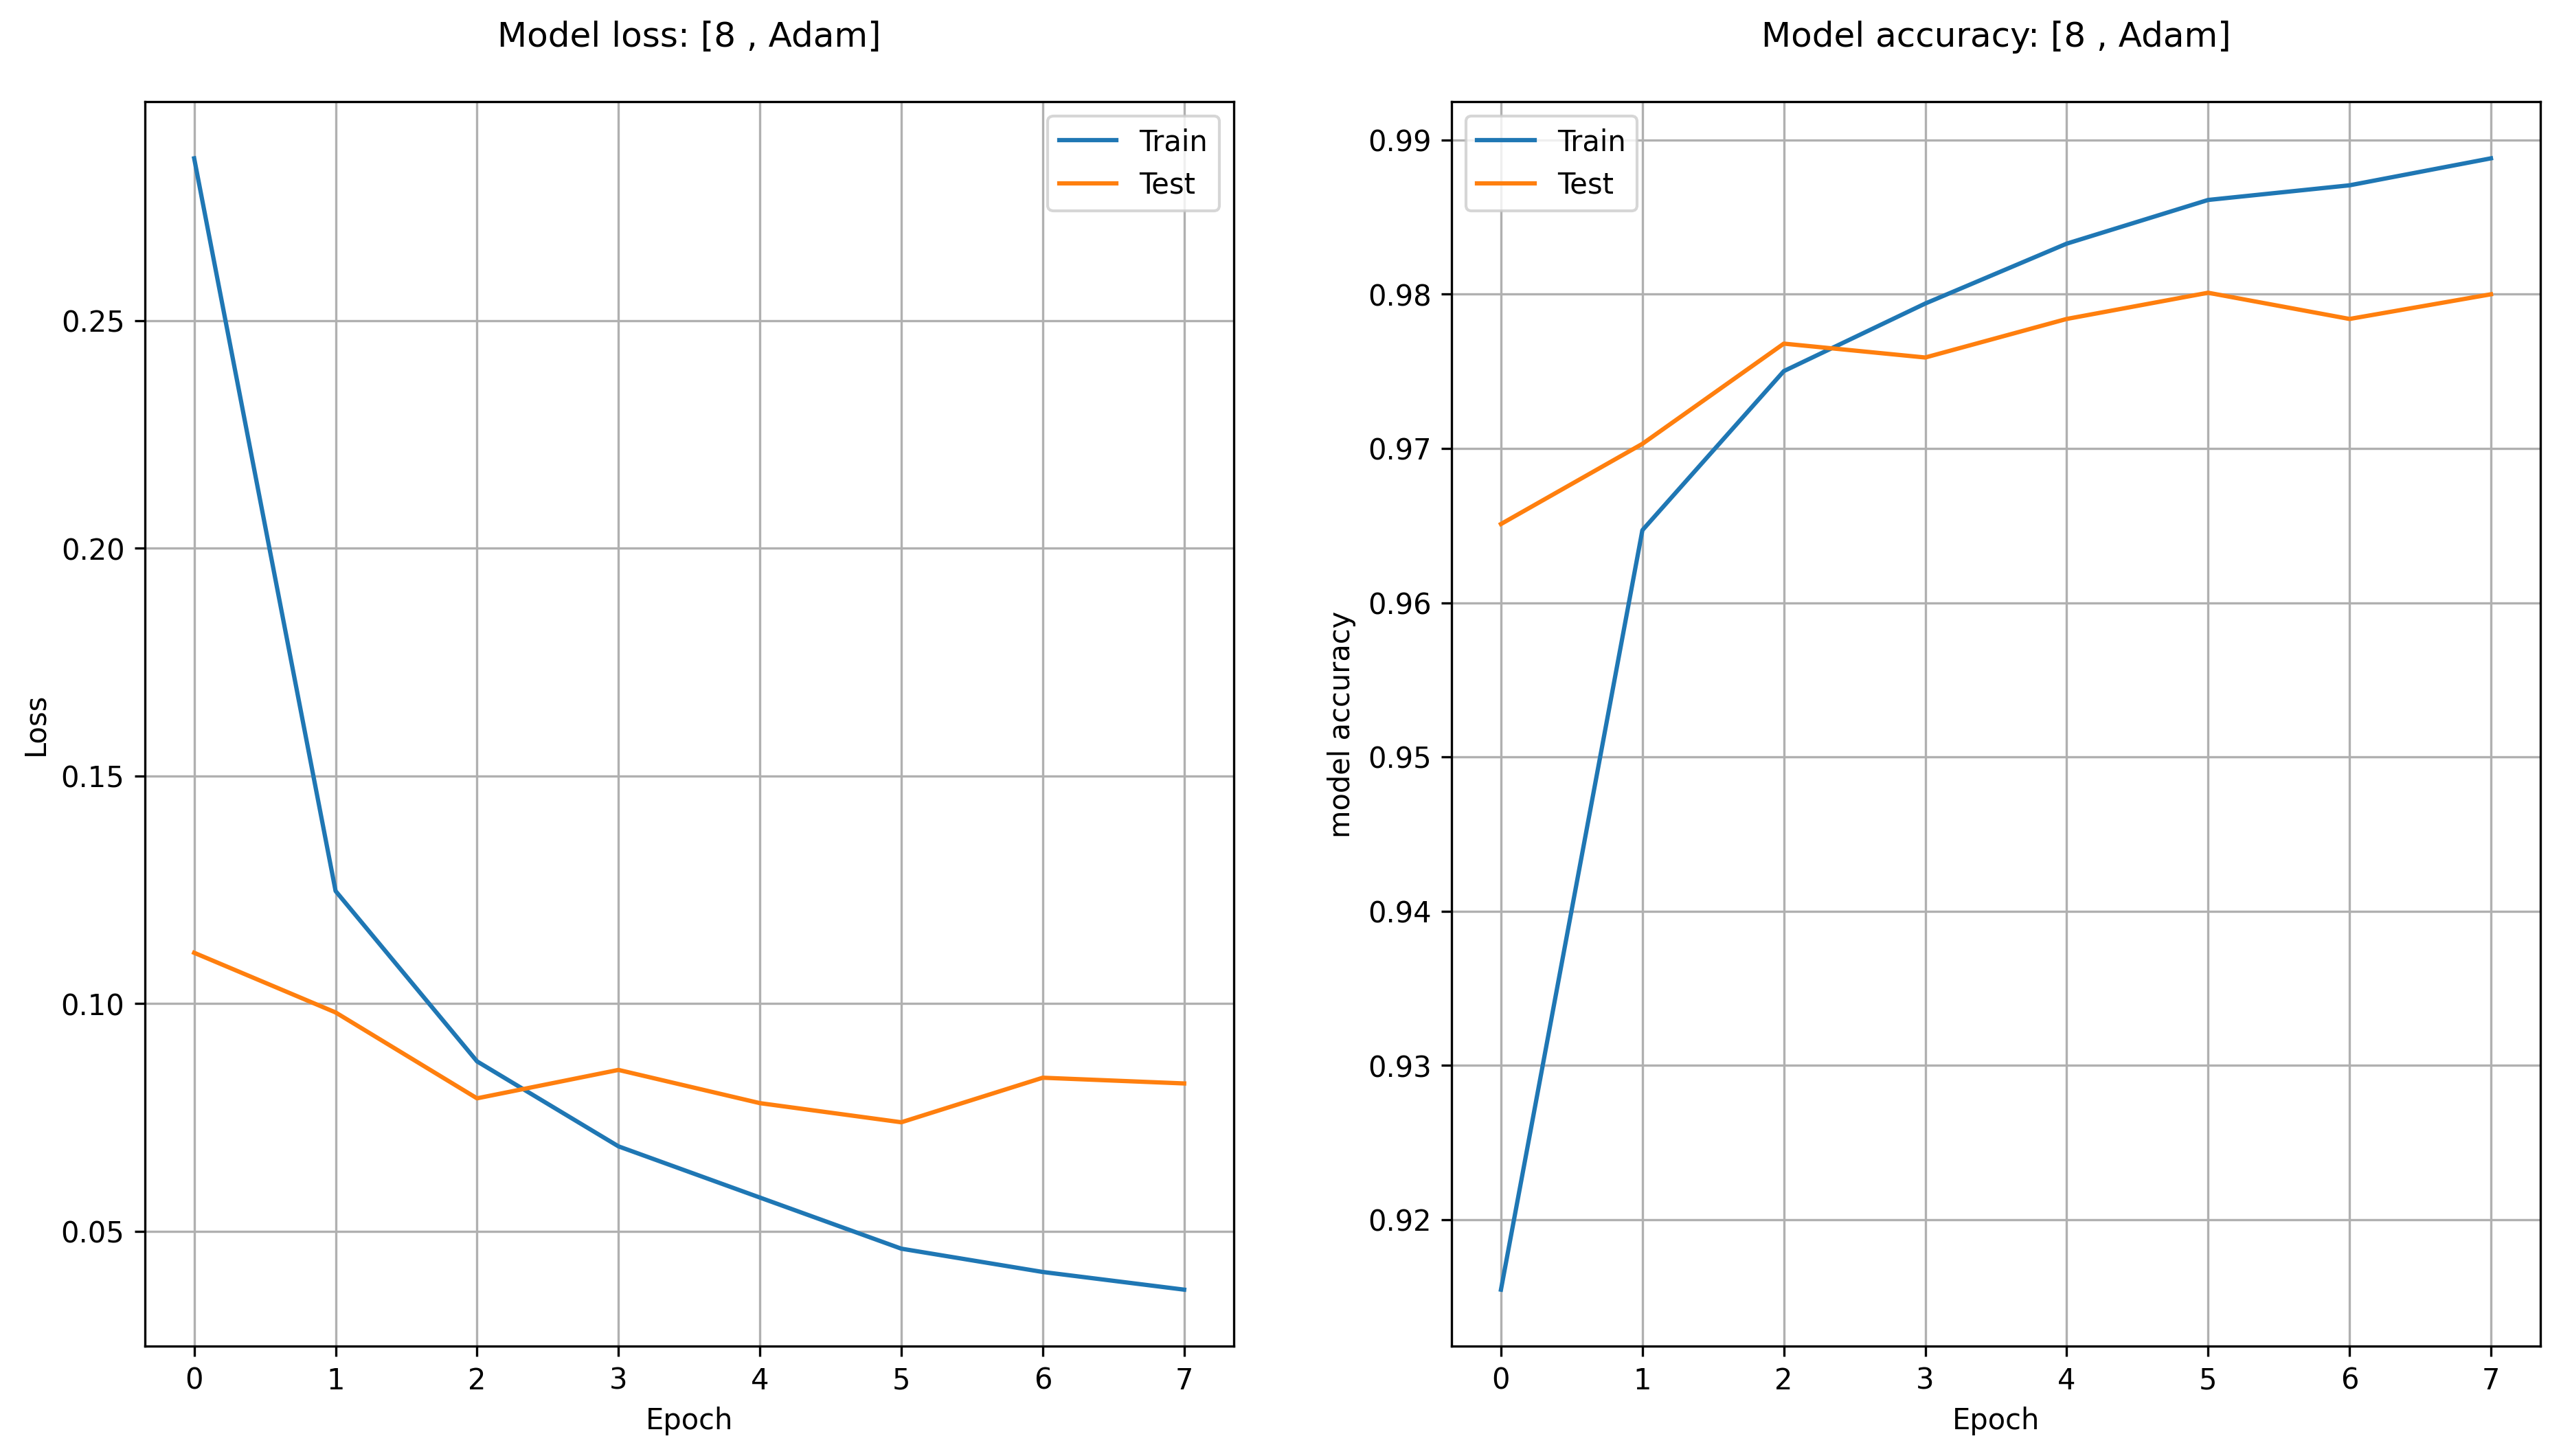

In [9]:

   
score.append( models_DNN[-1].evaluate(X_test, Y_test, verbose=0))
    
# print performance
print('Test loss:', score[-1][0])
print('Test accuracy:', score[-1][1])

# look into training history
fig=plt.figure(figsize=(15,8),dpi=300)


plt.subplot(1,2,1)
plt.plot(history[-1].history['loss'])
plt.plot(history[-1].history['val_loss'])
plt.title('Model loss: '+"["+"8 , Adam"+"]\n")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)


    
plt.subplot(1,2,2)
plt.plot(history[-1].history['acc'])
plt.plot(history[-1].history['val_acc'])
plt.title('Model accuracy: '+"["+"8 , Adam"+"]\n")
plt.ylabel('model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

We have obtained a better result for the model loss and a similar one for the accuracy.

**Adam** is the only optimizer that reaches an accuracy of $98\%$ and
**SGD** is the best optimizer to reduce the loss function and the computational time.


# Predictions Adam (8 epochs)

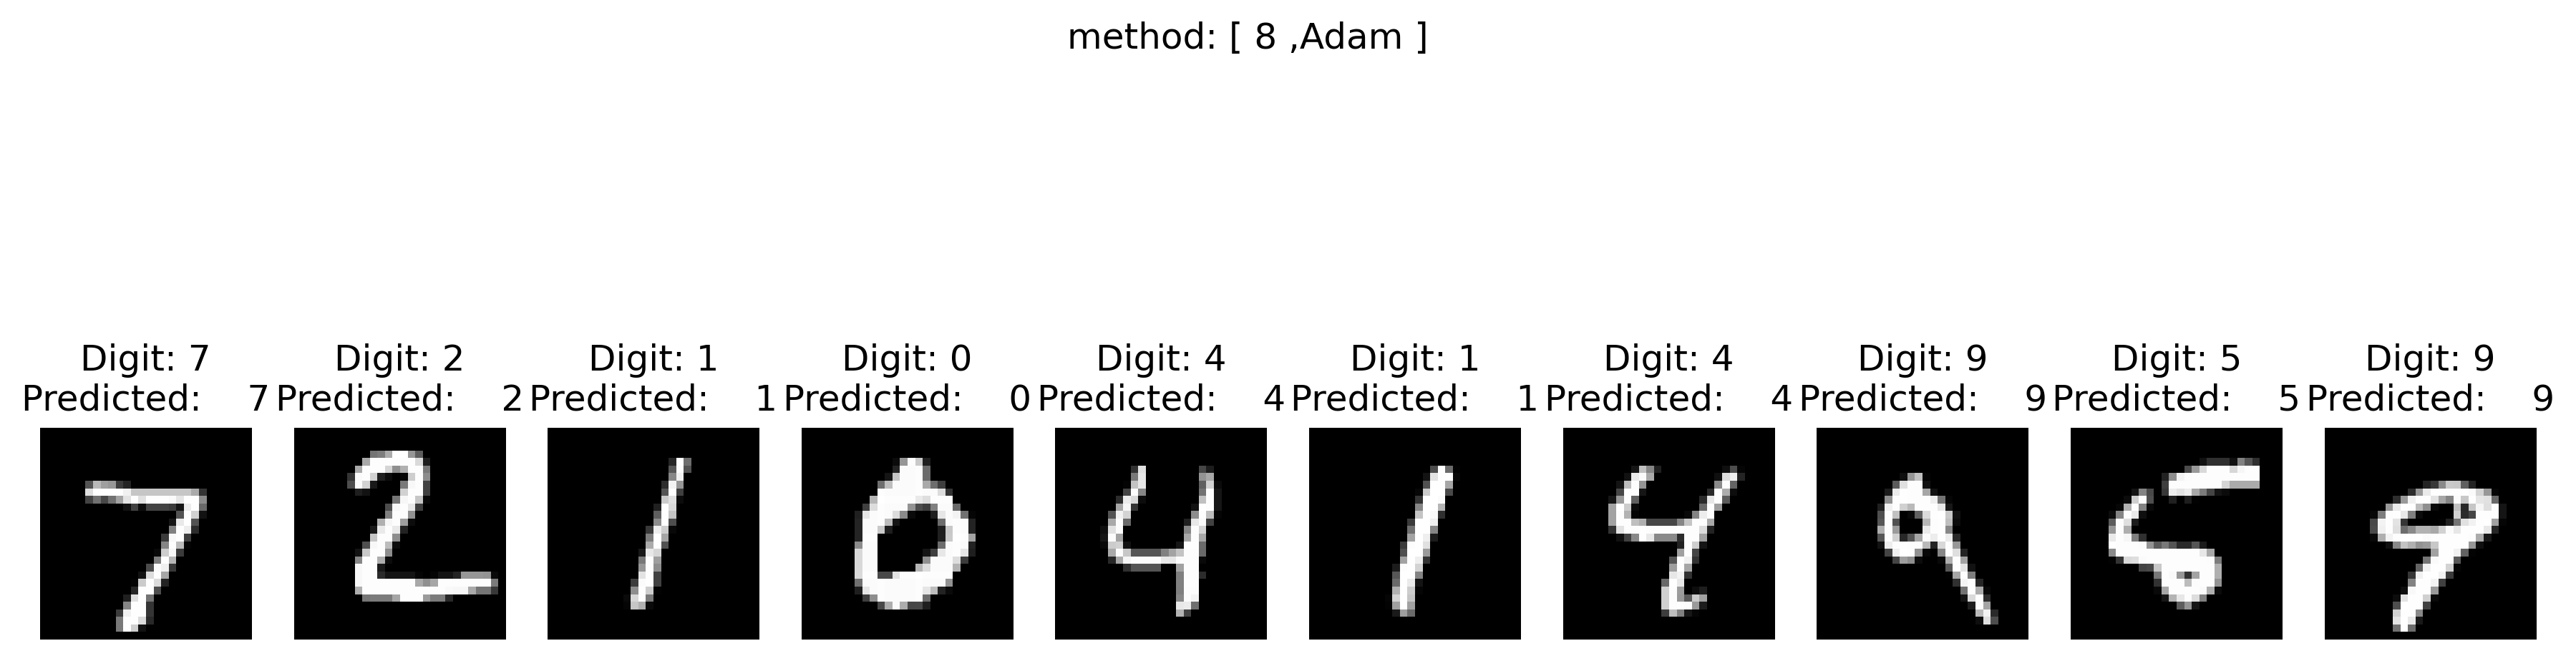

In [10]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
Combinations = product(N_epochs,opt)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

predictions = models_DNN[-1].predict(r,verbose=0)

   
plt.figure(figsize=(15, 5),dpi=300)
plt.suptitle("method: "+"["+" 8 ,Adam "+"]\n")
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
    
plt.show()

# 12.2
In this section, we will use a Convolutional Neural Network to exploit locality and translational invariance in our categorical problem.
From the previous results, we will use **Adam** as optimizer.

In [11]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
r=X_test

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [12]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2),
                     padding='valid',strides=2,
                     input_shape=input_shape))
    
    model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2),
                     padding='valid',strides=2,
                     input_shape=input_shape))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['acc'])
    return model

In [13]:
# training parameters
batch_size = 32
epochs = 15
history=[]
# create the deep conv net
model_CNN=create_CNN()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,callbacks=[callback],
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score.append( model_CNN.evaluate(X_test, Y_test, verbose=1))

# print performance
print()
print('Test loss:', score[-1][0])
print('Test accuracy:', score[-1][1])

Epoch 1/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2048 - acc: 0.9387 - val_loss: 0.0486 - val_acc: 0.9855
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0711 - acc: 0.9797 - val_loss: 0.0325 - val_acc: 0.9902
Epoch 3/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0547 - acc: 0.9845 - val_loss: 0.0295 - val_acc: 0.9914
Epoch 4/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0462 - acc: 0.9874 - val_loss: 0.0320 - val_acc: 0.9904
Epoch 5/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0402 - acc: 0.9889 - val_loss: 0.0301 - val_acc: 0.9910
Epoch 6/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0333 - acc: 0.9904 - val_loss: 0.0277 - val_acc: 0.9935
Epoch 7/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0332 - acc: 0.9913 - val_loss: 0.0238 - val_acc: 0.9934
Epoch 8/15
1875/1875 [==============================]

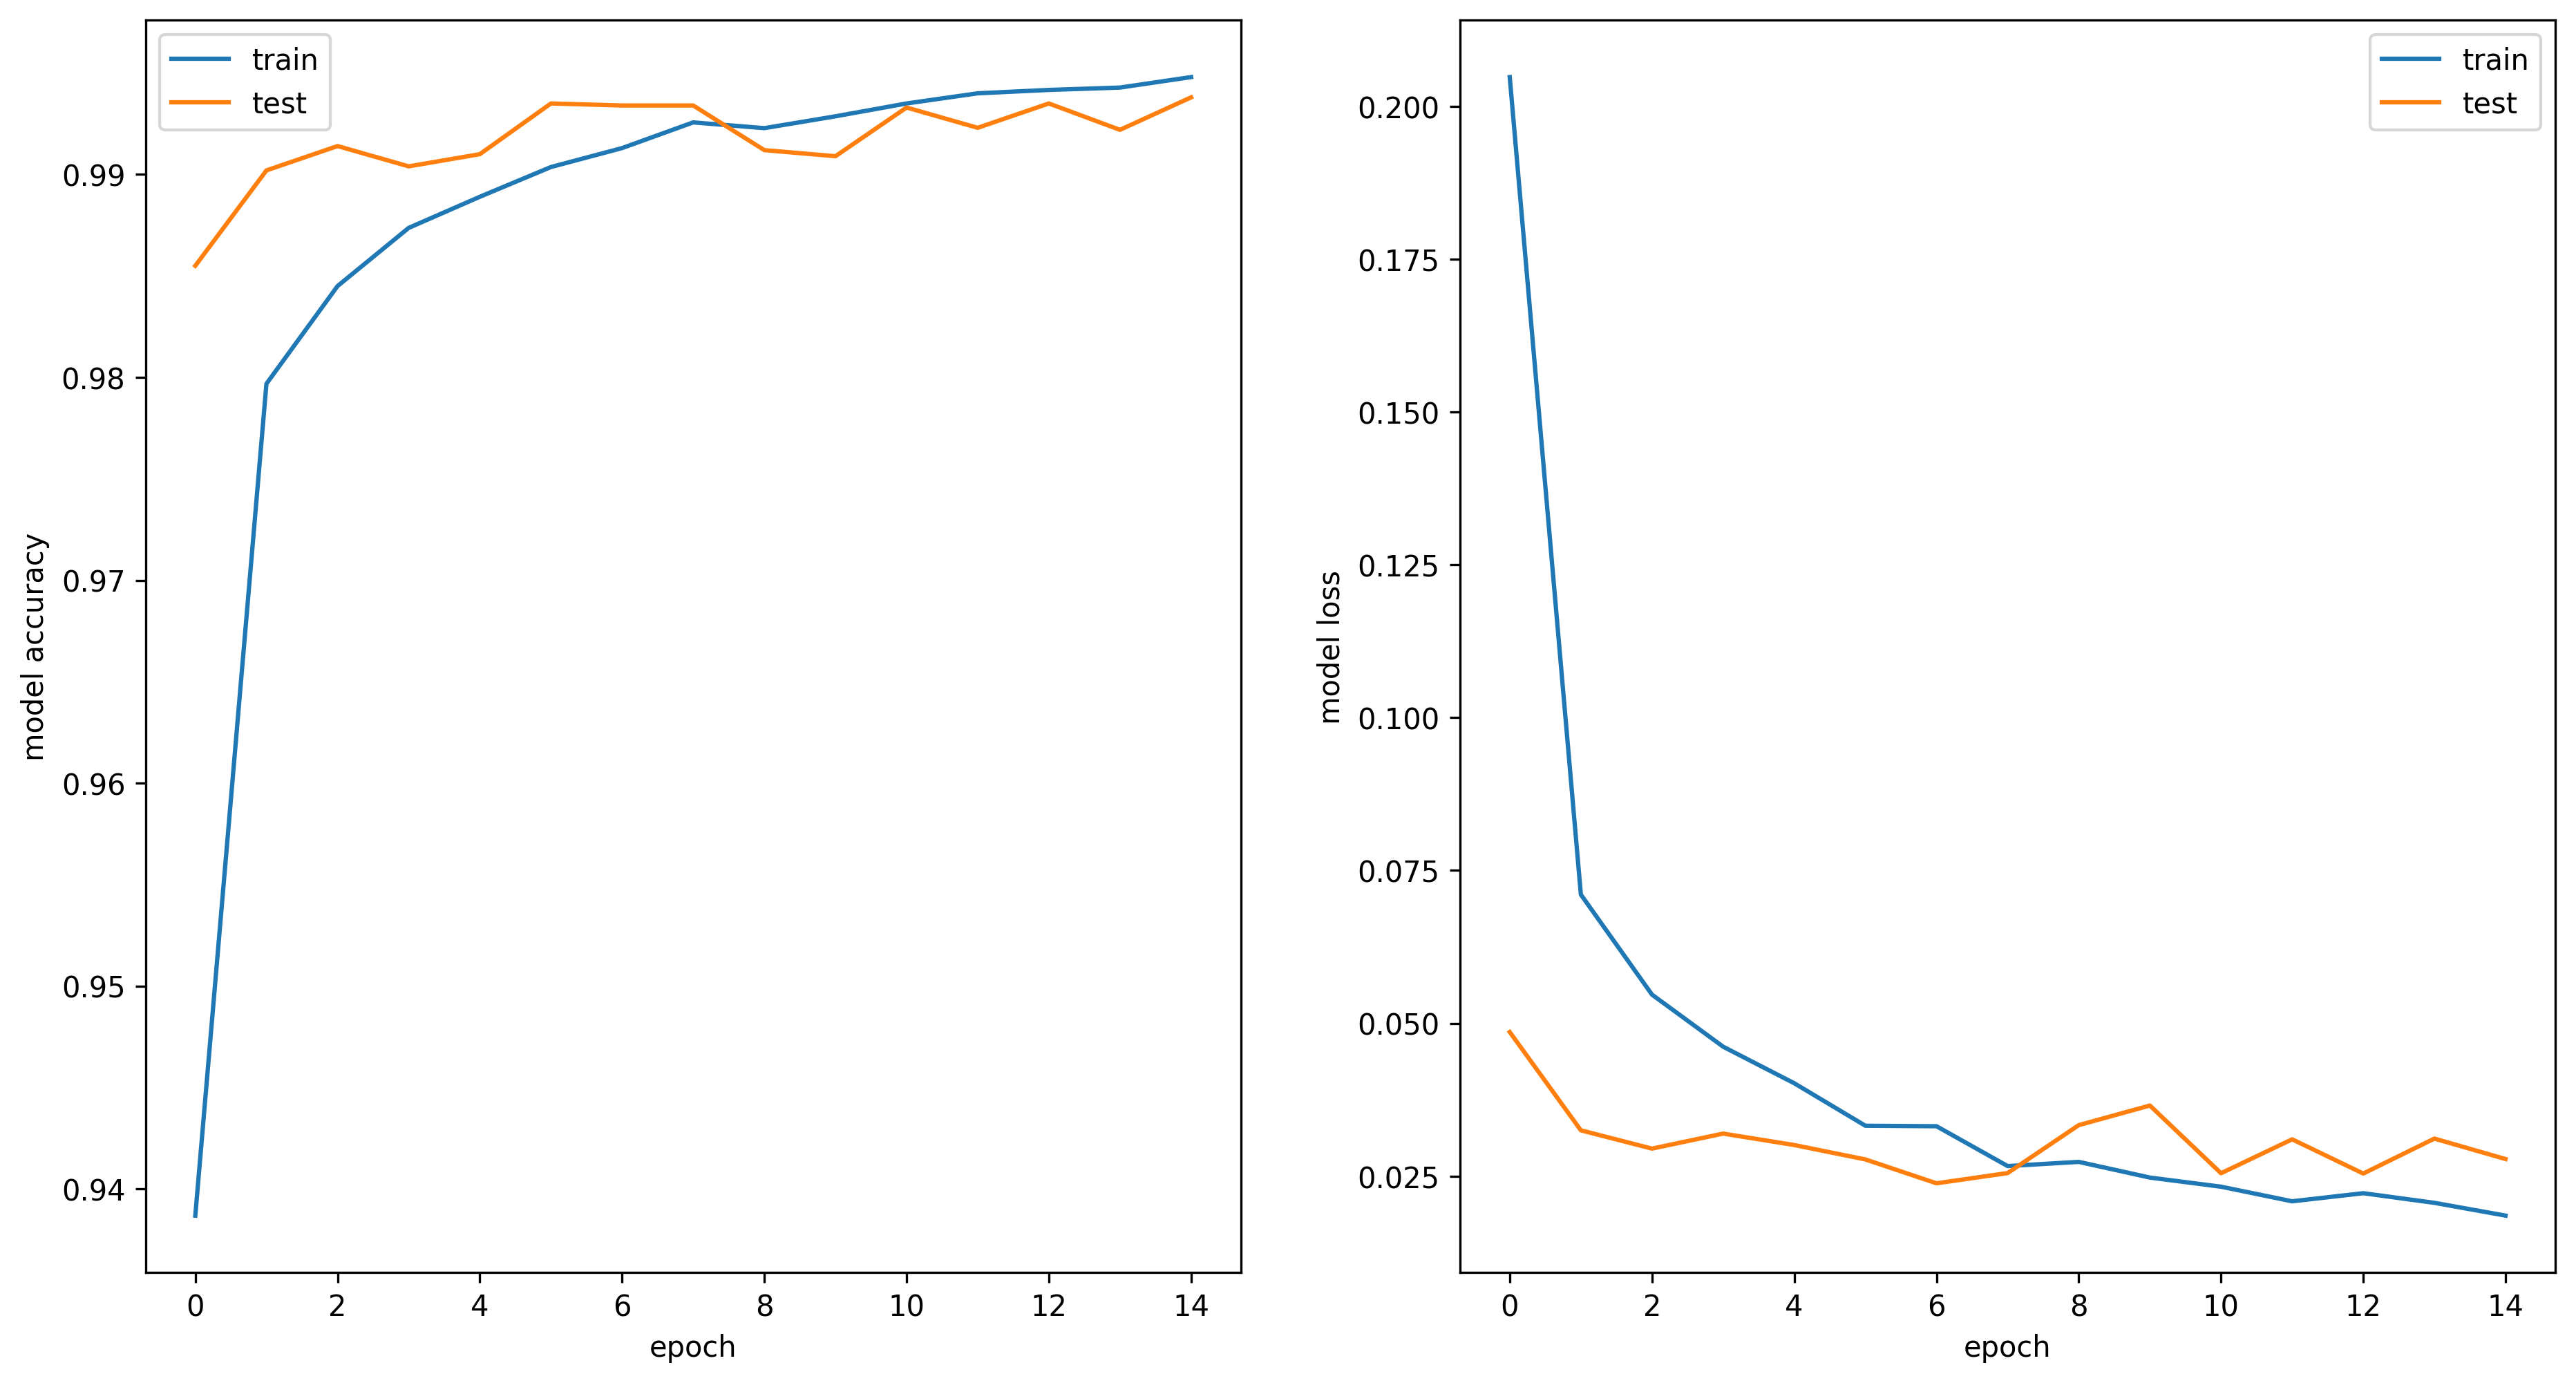

313/313 [==============================] - 1s 2ms/step


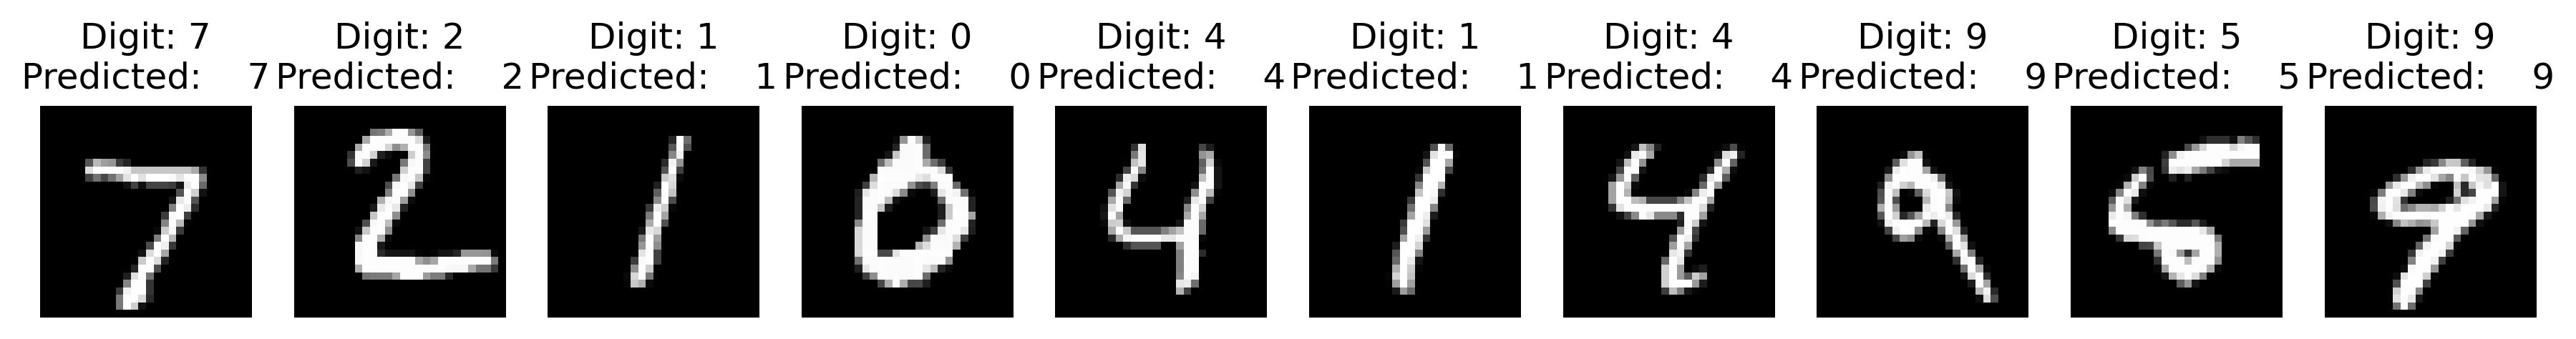

In [14]:
plt.figure(figsize=(15, 8),dpi=300) 
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15),dpi=300) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [15]:
model_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)              

With the Convolutional Neural Network, we have been able to reach an accuracy of $\approx 99\%$ and a model loss of $\approx 0.03$. 
Both results are better than what we obtained with DNN models.

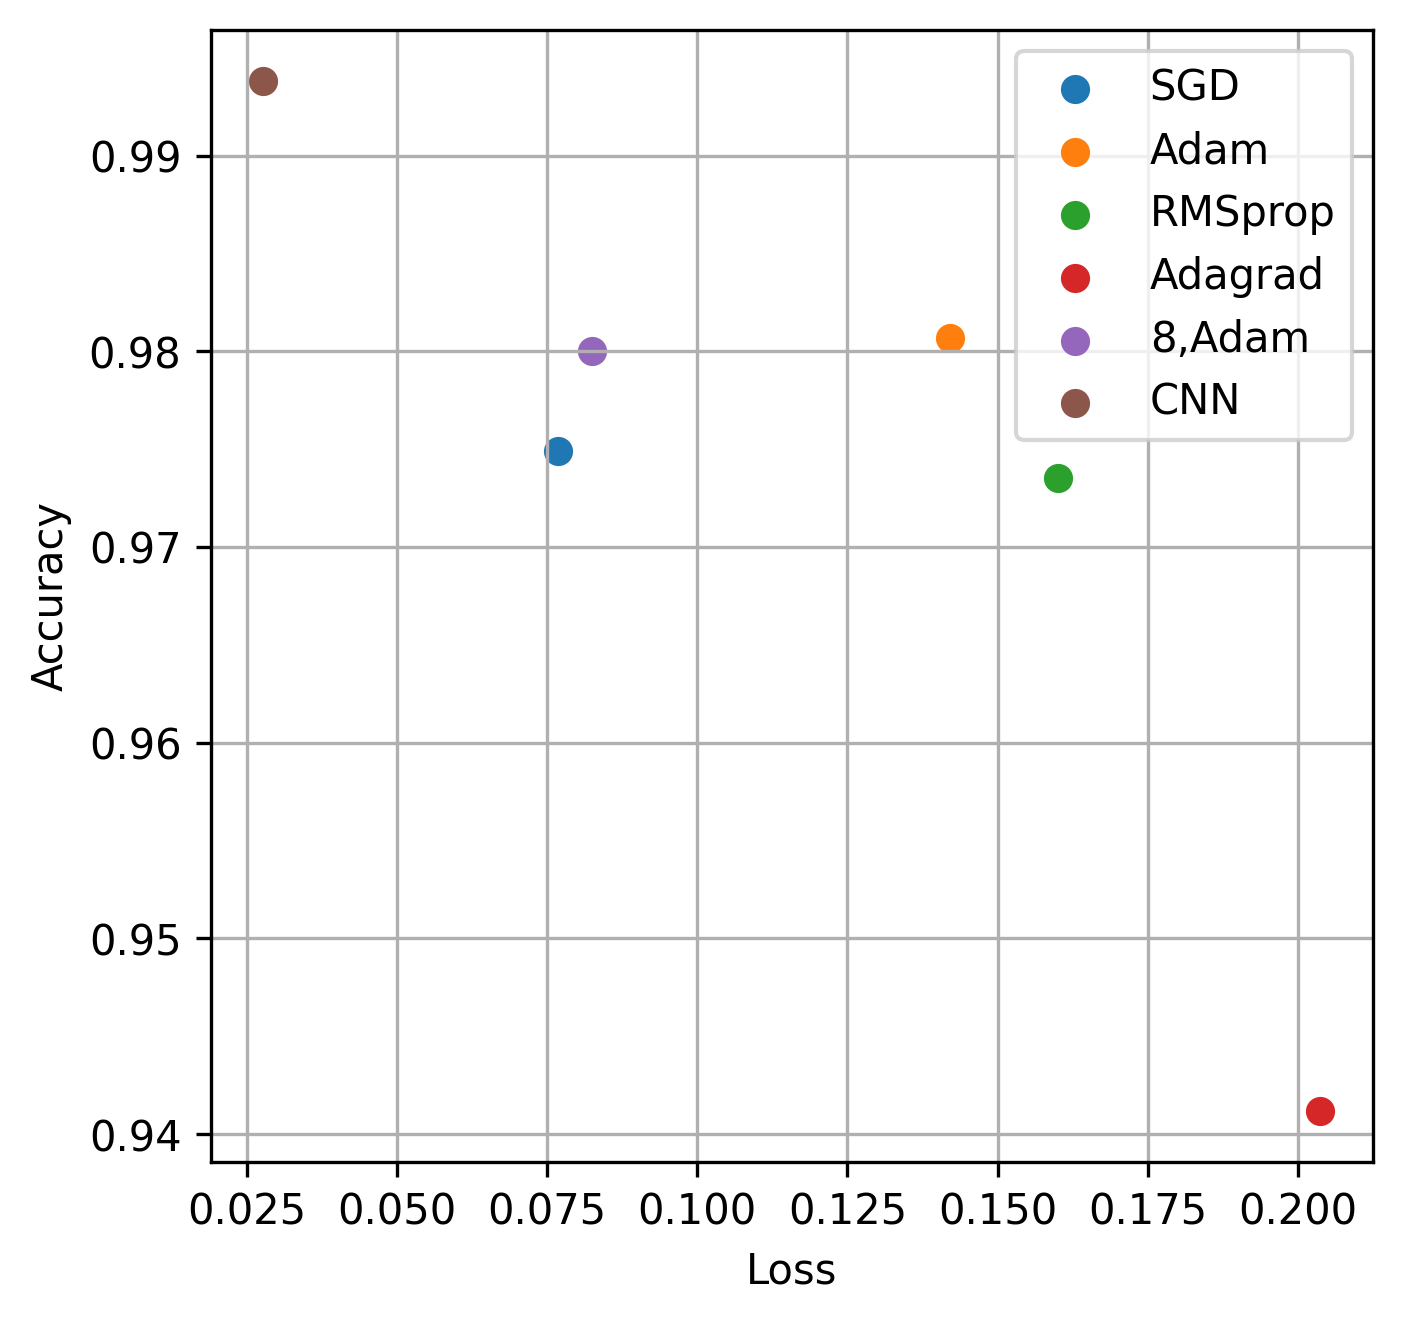

In [41]:
label.append("CNN")
plt.figure(figsize=(5, 5),dpi=300) 
for i in range(len(score)):
    plt.scatter(score[i][0],score[i][1],label=label[i])
plt.legend(loc="best")
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 12.3

In [17]:
from PIL import Image
import os

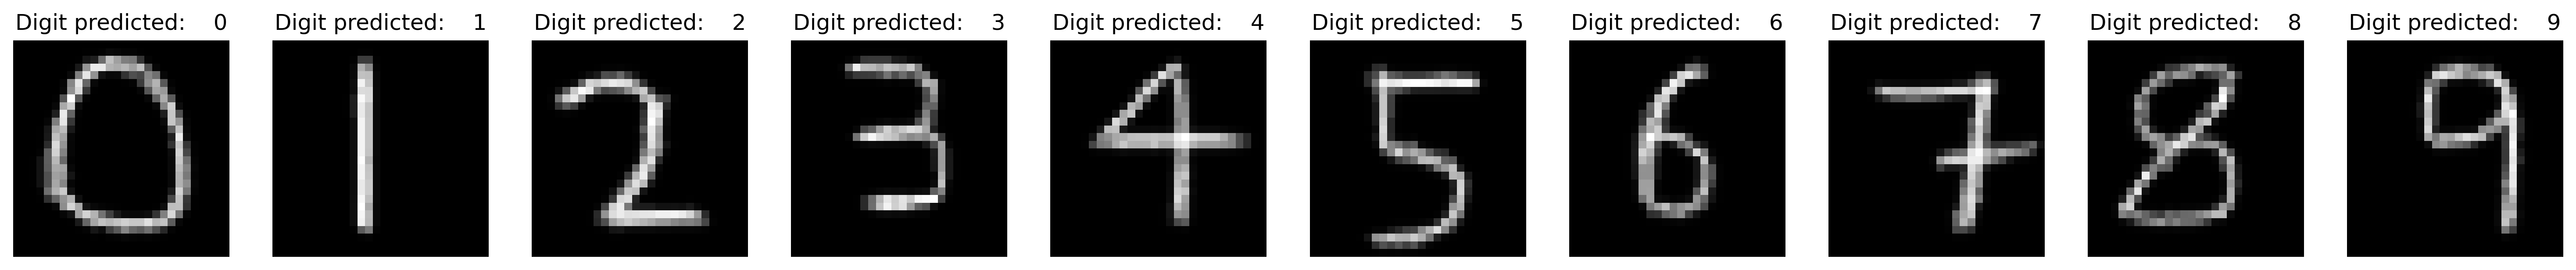

In [33]:

plt.figure(figsize=(25, 25),dpi=300) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1) 
    digit_filename = "./Pictures/"+str(i)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
#print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    #print(data.shape)
    data = data.reshape(1, img_rows, img_cols, 1)
    #print(data.shape)
    pred_0 = model_CNN.predict(data,verbose=0)
    data = data.reshape(xdim,ydim)
    plt.imshow(data, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()




The model was able to correctly predict my writing.
Of course, since this test was done only on 10 images, we don't know if the model is able to generalise what it learned from the MNIST database.

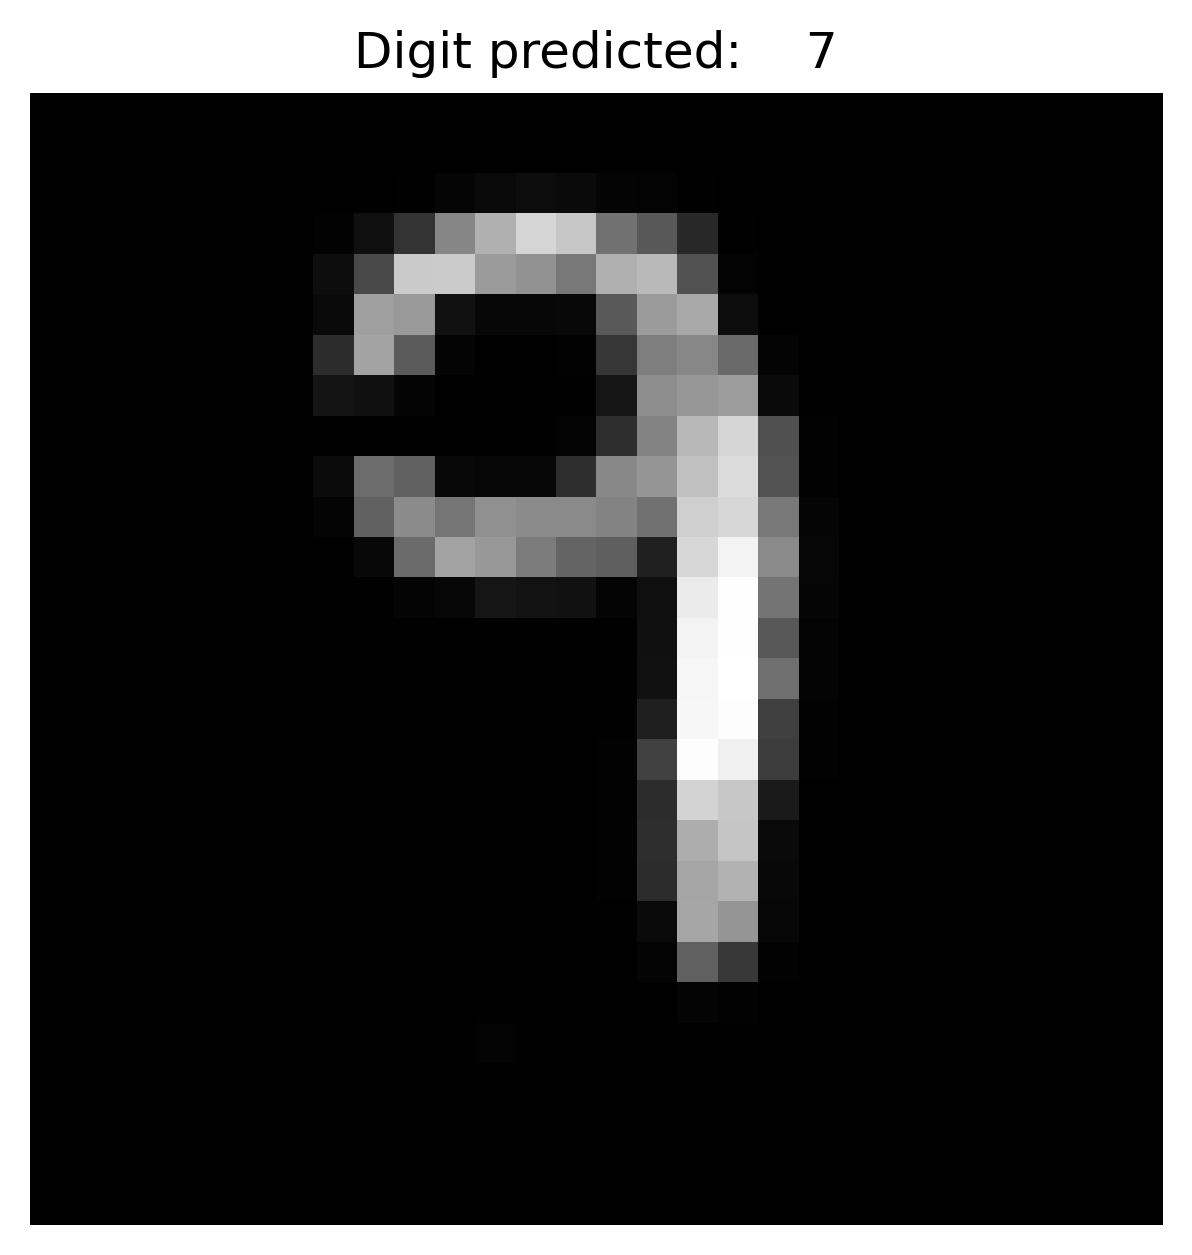

In [36]:
plt.figure(figsize=(5, 5),dpi=300)  
digit_filename = "./Pictures/9bad"+".png"
digit_in = Image.open(digit_filename).convert('L')
ydim, xdim = digit_in.size
#print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
     for i in range(xdim):
        data[i,j]=pix[j,i]
data /= 255
    #print(data.shape)
data = data.reshape(1, img_rows, img_cols, 1)
    #print(data.shape)
pred_0 = model_CNN.predict(data,verbose=0)
data = data.reshape(xdim,ydim)
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()


The model wasn't able to correctly predict a bad written digit (it was a 9).

In [37]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d
1 max_pooling2d
2 conv2d_1
3 max_pooling2d_1
4 dropout_5
5 flatten
6 dense_15
7 dense_16
8 dropout_6
9 dense_17


(5, 5, 1, 16)


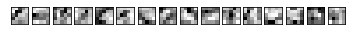

In [38]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

In [39]:
test_index = 10

from keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    if (row_size == 1):
        fig, ax = plt.subplots(1,col_size, figsize=(row_size*20,col_size*1))
        
        
    else:
        fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*1))
        
    if (row_size==1):
        for col in range(0,col_size):
            ax[col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
        
    else:
        for row in range(0,row_size):
            for col in range(0,col_size):
                ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
                activation_index += 1
     

1/1 [==============================] - 0s 94ms/step


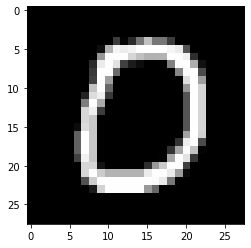

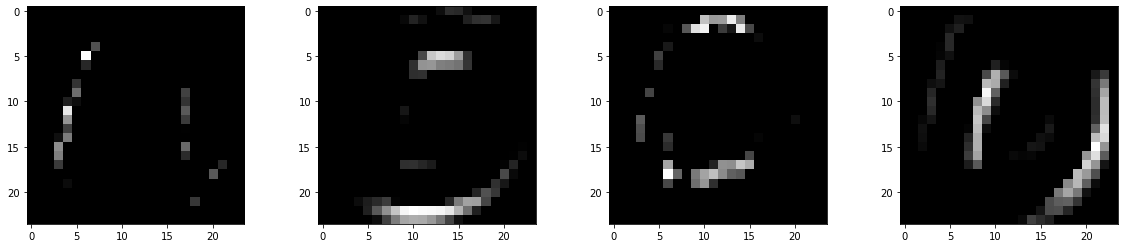

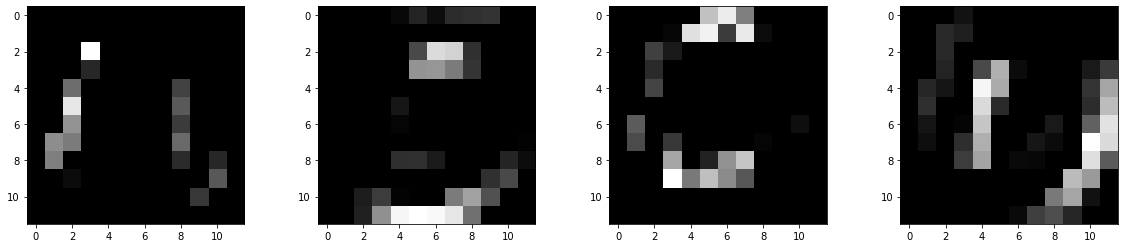

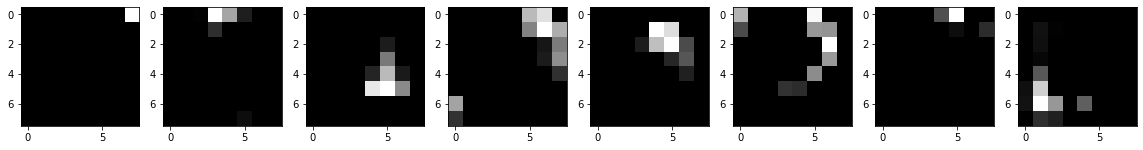

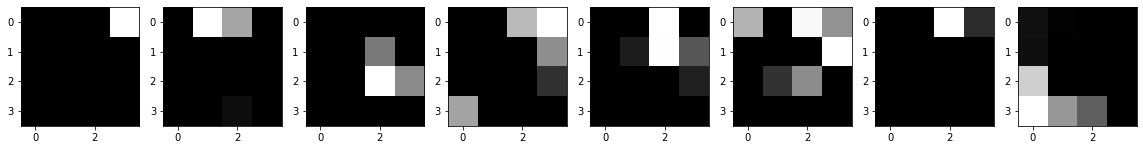

In [40]:
%matplotlib inline
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)

display_activation(activations, 4, 1, 0)

display_activation(activations, 4, 1, 1)

display_activation(activations, 8, 1, 2)
display_activation(activations, 8, 1, 3)

# col_size x row_size must be <= Number of filters for the convolutional layer